In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn import linear_model
#from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

from itertools import combinations

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## Cargo base de datos: Fifa Ranking 'rankings' 

In [2]:
rankings = pd.read_csv('fifa_ranking.csv')

In [3]:
rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
1,2,Italy,ITA,0.00,57,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
2,3,Switzerland,SUI,0.00,50,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
3,4,Sweden,SWE,0.00,55,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
4,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.00,54,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
6,7,Russia,RUS,0.00,52,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
7,8,Brazil,BRA,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.00,49,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08
9,10,Denmark,DEN,0.00,51,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-08-08


In [4]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [5]:
rankings.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [6]:
rankings.shape

(57793, 16)

Mejoro mi BDD

In [7]:
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings = rankings.replace({"IR Iran": "Iran"})
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings ['rank_date'] = pd.to_datetime(rankings['rank_date'])



In [8]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 8 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
cur_year_avg_weighted      57793 non-null float64
rank_date                  57793 non-null datetime64[ns]
two_year_ago_weighted      57793 non-null float64
three_year_ago_weighted    57793 non-null float64
weighted_points            57793 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 3.5+ MB


In [9]:
rankings.shape

(57793, 8)

Corroboro de que no existan valores nulls

In [10]:
rankings.isna().sum()

rank                       0
country_full               0
country_abrv               0
cur_year_avg_weighted      0
rank_date                  0
two_year_ago_weighted      0
three_year_ago_weighted    0
weighted_points            0
dtype: int64

Ordeno los datos por pesos:

In [11]:
rankings = rankings.set_index(['rank_date'])\
                    .groupby(['weighted_points'],group_keys = False)\
                    .resample('D').first()\
                    .fillna(method='ffill')\
                    .reset_index()
rankings.head()

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1993-08-08,1.0,Germany,GER,0.0,0.0,0.0,0.0
1,1993-08-09,1.0,Germany,GER,0.0,0.0,0.0,0.0
2,1993-08-10,1.0,Germany,GER,0.0,0.0,0.0,0.0
3,1993-08-11,1.0,Germany,GER,0.0,0.0,0.0,0.0
4,1993-08-12,1.0,Germany,GER,0.0,0.0,0.0,0.0


In [12]:
rankings.describe()

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
count,642256.000000,642256.000000,642256.000000,642256.000000,642256.000000
mean,115.756859,161.705572,44.600399,30.926695,237.232666
std,54.180348,146.241946,43.055832,28.728892,197.567239
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,51.000000,10.200000,8.500000,86.110000
50%,118.000000,125.160000,34.660000,24.250000,188.520000
75%,159.000000,234.820000,65.960000,46.010000,325.410000
max,209.000000,1158.660000,347.910000,240.150000,1511.500000


Analizo correlaciones: 

In [13]:
rankings.corr()

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
rank,1.000000,-0.835534,-0.701095,-0.719897,-0.875946
cur_year_avg_weighted,-0.835534,1.000000,0.628973,0.643415,0.970847
two_year_ago_weighted,-0.701095,0.628973,1.000000,0.662823,0.779888
three_year_ago_weighted,-0.719897,0.643415,0.662823,1.000000,0.766127
weighted_points,-0.875946,0.970847,0.779888,0.766127,1.000000


Gafico de correlaciones:

Text(0.5, 1.0, 'Correlación CON pesos = cero')

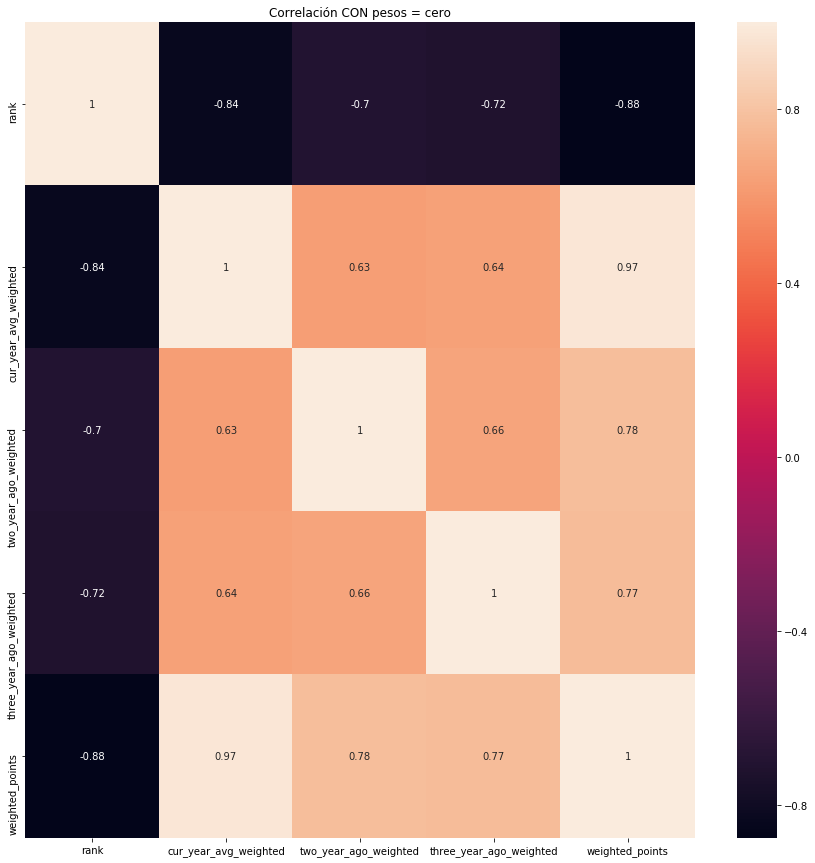

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
corrrank = rankings.corr()
corrrank
sns.heatmap(corrrank,annot=True)
plt.title('Correlación CON pesos = cero')

Text(0.5, 1.0, 'Pesos')

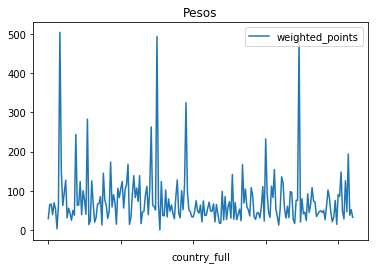

In [15]:
rankings.groupby('country_full')['weighted_points'].std().plot(kind='line',legend='Reverse')
plt.title('Pesos')

Comparamos las correlaciones quitando los pesos iguales a cero, para comprobar de que ...._year_ago_weighted estan todas correlacionadas con weighted_points 

In [16]:
sin_pesocero = rankings [rankings ['weighted_points'] != 0]
sin_pesocero.head()

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
9070,2014-07-17,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9071,2014-07-18,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9072,2014-07-19,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9073,2014-07-20,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9074,2014-07-21,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47


In [17]:
sin_pesocero.corr()

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
rank,1.000000,-0.885725,-0.744280,-0.764941,-0.930776
cur_year_avg_weighted,-0.885725,1.000000,0.622807,0.637234,0.970347
two_year_ago_weighted,-0.744280,0.622807,1.000000,0.657358,0.776052
three_year_ago_weighted,-0.764941,0.637234,0.657358,1.000000,0.761802
weighted_points,-0.930776,0.970347,0.776052,0.761802,1.000000


Text(0.5, 1.0, 'Correlación SIN pesos = cero')

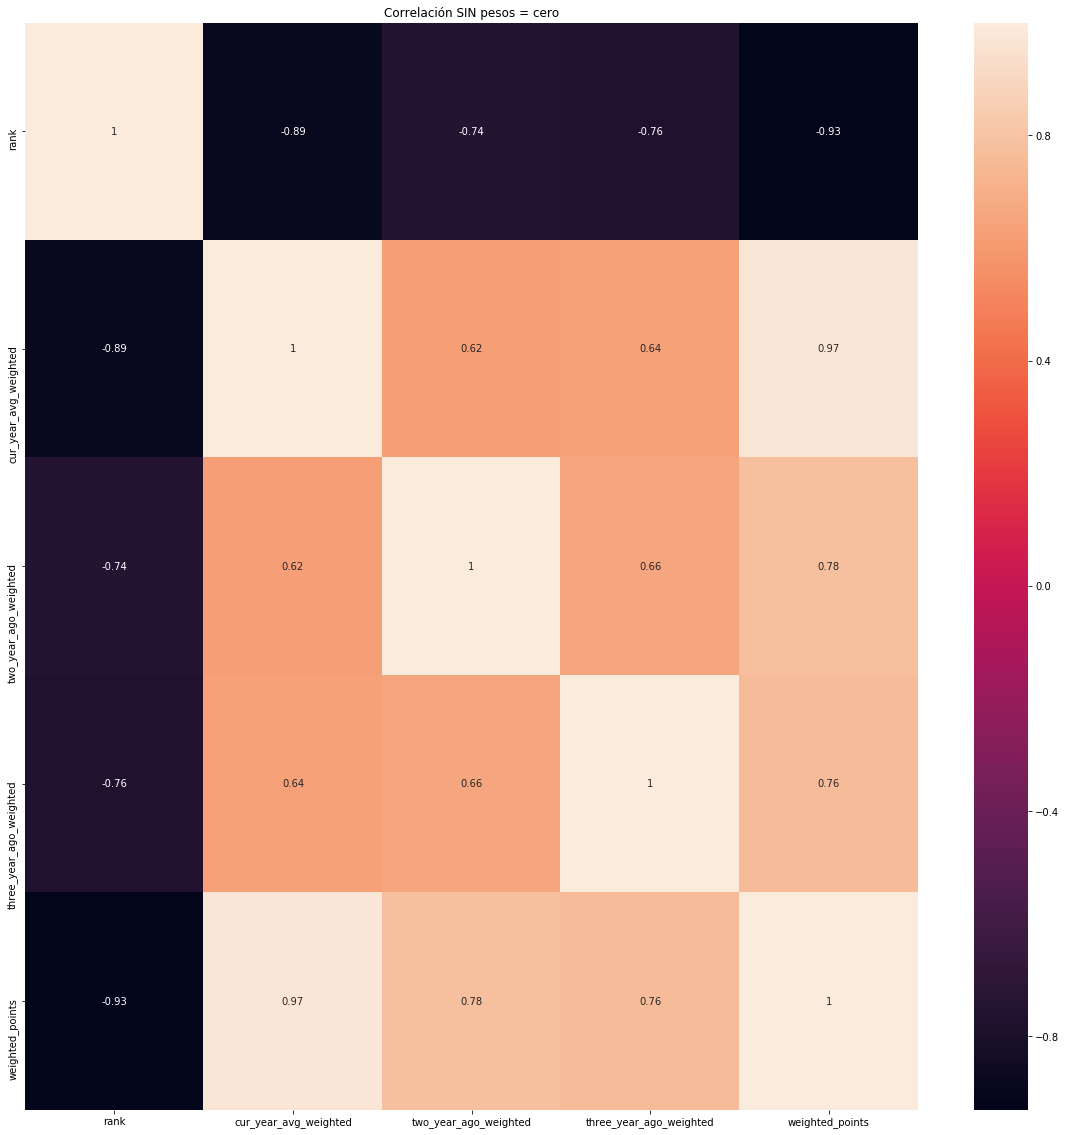

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corrrank = sin_pesocero.corr()
corrrank
sns.heatmap(corrrank,annot=True)
plt.title('Correlación SIN pesos = cero')

Text(0.5, 1.0, 'Sin pesos = cero')

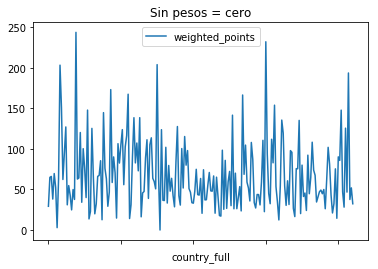

In [6]:
sin_pesocero.groupby('country_full')['weighted_points'].std().plot(kind='line',legend='Reverse')
plt.title('Sin pesos = cero')

In [36]:
print (rankings ["country_full"] .nunique() )

216


In [9]:
paises1 = pd.value_counts (rankings ["country_full"])
paises = pd.DataFrame (paises1)

print(paises.sort_index(axis=1, ascending=True))

                          country_full
Sudan                              325
Tunisia                            286
Macau                              286
Romania                            286
Northern Ireland                   286
Antigua and Barbuda                286
Nepal                              286
Ethiopia                           286
Belgium                            286
United Arab Emirates               286
Netherlands                        286
Korea DPR                          286
Botswana                           286
Zambia                             286
Argentina                          286
Spain                              286
Venezuela                          286
Mali                               286
Namibia                            286
Syria                              286
Kenya                              286
Iran                               286
Iraq                               286
Greece                             286
Swaziland                

Veo que los paises que nos interesan, que estuvieron en la copa mundial 2018, no rankean entre los mejores o mas partidos tienen, por ende, filtrare solo por el torneo una vez hecho el match con la siguiente tabla. 

Analizo los partidos con mayor peso y mayor ranking, sin considerar los pesos = 0

In [18]:
sin_pesocero.head()

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
9070,2014-07-17,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9071,2014-07-18,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9072,2014-07-19,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9073,2014-07-20,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47
9074,2014-07-21,207.0,Anguilla,AIA,0.0,0.0,1.47,1.47


In [19]:
hola = sin_pesocero.groupby(['country_full']).mean()
hola

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,
Afghanistan,140.785420,99.270100,27.675743,11.035846,137.981688
Albania,66.388243,241.246875,59.952301,49.875341,351.074517
Algeria,32.721448,340.712897,132.158245,79.397437,552.268579
American Samoa,180.335796,76.973598,2.905309,2.227276,82.106183
Andorra,191.709747,36.749105,1.091350,0.604946,38.445401
Angola,92.211846,198.974189,36.745470,48.617076,284.336734
Anguilla,202.953125,4.160148,0.796776,0.281447,5.238372
Antigua and Barbuda,93.352372,226.900886,20.478799,37.428649,284.808334
Argentina,3.456835,665.180612,204.877986,135.145234,1005.203831


In [20]:
paises_mayor_peso = hola.sort_values(by='weighted_points',ascending=0)

Analizo si los primeros 10 valores de cada tabla son los mismos paises 

In [21]:
paises_mayor_peso.head(10)

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,
Germany,2.403175,722.340730,208.687143,146.096381,1077.124254
Argentina,3.456835,665.180612,204.877986,135.145234,1005.203831
Spain,6.366327,590.828751,220.669991,138.385578,949.884320
Brazil,6.264940,614.550558,197.707908,122.527211,934.785677
Colombia,9.650621,597.143835,170.418649,111.173618,878.736102
Belgium,14.688525,597.831677,161.651803,95.615322,855.098802
Chile,11.382706,616.527838,149.876757,88.601209,855.005805
Portugal,6.478864,545.125079,171.748250,120.678111,837.551440
Uruguay,11.558739,533.392765,169.866920,111.574413,814.834097


In [22]:
high_weighted = paises_mayor_peso.loc[:,['weighted_points']]
high_weighted.head(15)

,weighted_points
country_full,
Germany,1077.124254
Argentina,1005.203831
Spain,949.884320
Brazil,934.785677
Colombia,878.736102
Belgium,855.098802
Chile,855.005805
Portugal,837.551440
Uruguay,814.834097


Text(0.5, 1.0, 'Distribucion de los pesos SIN ceros')

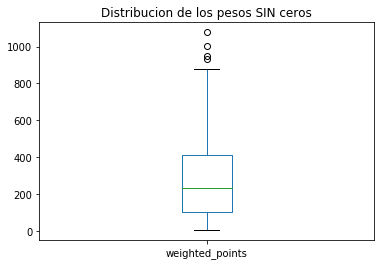

In [23]:
high_weighted.plot(kind='box',legend='Reverse')
plt.title ('Distribucion de los pesos SIN ceros')

In [24]:
diez = high_weighted [0:10]
diez

,weighted_points
country_full,
Germany,1077.124254
Argentina,1005.203831
Spain,949.884320
Brazil,934.785677
Colombia,878.736102
Belgium,855.098802
Chile,855.005805
Portugal,837.551440
Uruguay,814.834097


# RANK
Genero analisis de rankings!

In [26]:
hola.head()

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,
Afghanistan,140.785420,99.270100,27.675743,11.035846,137.981688
Albania,66.388243,241.246875,59.952301,49.875341,351.074517
Algeria,32.721448,340.712897,132.158245,79.397437,552.268579
American Samoa,180.335796,76.973598,2.905309,2.227276,82.106183
Andorra,191.709747,36.749105,1.091350,0.604946,38.445401


In [27]:
paises_mayor_ranking = hola.sort_values(by='rank',ascending=1)

In [28]:
high_rank = paises_mayor_ranking.loc[:,['rank']]
high_rank.head(10)

,rank
country_full,
Germany,2.403175
Argentina,3.456835
Brazil,6.264940
Spain,6.366327
Portugal,6.478864
Colombia,9.650621
England,10.983607
Chile,11.382706
Uruguay,11.558739


In [29]:
highrank = high_rank [0:10]
highrank.round(0)

,rank
country_full,
Germany,2.0
Argentina,3.0
Brazil,6.0
Spain,6.0
Portugal,6.0
Colombia,10.0
England,11.0
Chile,11.0
Uruguay,12.0


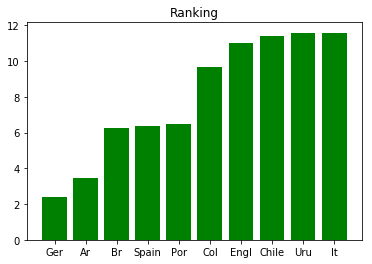

In [30]:
x = range(len(highrank['rank']))
    
nombres = ("Ger", "Ar", "Br" ,"Spain", "Por", "Col", "Engl", "Chile" , "Uru" , "It" )

plt.bar(x, highrank['rank'], align = "center", color = "green")
plt.xticks(x, nombres)
plt.title("Ranking")
plt.show()

Hago el mismo analisis pero con la db rankings!

In [31]:
holaa = rankings.groupby(['country_full']).mean()
holaa.head()

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,
Afghanistan,140.785420,99.270100,27.675743,11.035846,137.981688
Albania,66.388243,241.246875,59.952301,49.875341,351.074517
Algeria,32.721448,340.712897,132.158245,79.397437,552.268579
American Samoa,180.609682,75.669356,2.856082,2.189537,80.714974
Andorra,191.709747,36.749105,1.091350,0.604946,38.445401


In [32]:
paises_mayor_peso2 = holaa.sort_values(by='weighted_points',ascending=0)
paises_mayor_peso2.head(10)

,rank,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,
Colombia,9.650621,597.143835,170.418649,111.173618,878.736102
Belgium,14.688525,597.831677,161.651803,95.615322,855.098802
Chile,11.382706,616.527838,149.876757,88.601209,855.005805
Portugal,6.478864,545.125079,171.748250,120.678111,837.551440
Germany,2.065060,548.282723,158.401084,110.892434,817.576241
Uruguay,11.558739,533.392765,169.866920,111.574413,814.834097
Switzerland,12.128625,554.855246,150.597327,104.778575,810.231148
England,10.983607,535.500277,163.933014,109.474590,808.907881
Netherlands,13.727410,474.083690,176.878916,136.241521,787.204127


In [96]:
high_weighted_concero = paises_mayor_peso2.loc[:,['weighted_points']]
high_weighted_concero.head(20)

,weighted_points
country_full,
Colombia,878.736102
Belgium,855.098802
Chile,855.005805
Portugal,837.551440
Germany,817.576241
Uruguay,814.834097
Switzerland,810.231148
England,808.907881
Netherlands,787.204127


Text(0.5, 1.0, 'Distribucion de los pesos CON cero')

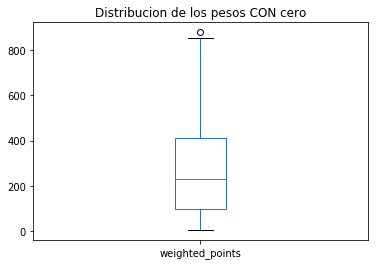

In [97]:
high_weighted_concero.plot(kind='box',legend='Reverse')
plt.title ('Distribucion de los pesos CON cero')

In [34]:
paises_mayor_peso2.head(10)

,weighted_points,country_full
40379,1107.90,Netherlands
40380,1026.43,Spain
40381,899.79,Germany
40382,866.50,England
40383,796.19,Uruguay
40384,777.63,Brazil
40385,898.66,Italy
40386,715.16,Portugal
40387,636.86,Argentina
40388,844.54,Croatia


In [32]:
paises_mayor_peso2 = paises_mayor_peso  [0:20]
paises_mayor_peso2

,weighted_points,country_full
40379,1107.90,Netherlands
40380,1026.43,Spain
40381,899.79,Germany
40382,866.50,England
40383,796.19,Uruguay
40384,777.63,Brazil
40385,898.66,Italy
40386,715.16,Portugal
40387,636.86,Argentina
40388,844.54,Croatia


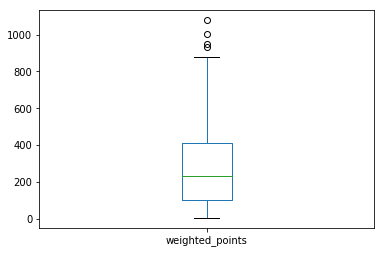

In [33]:
paises_mayor_peso.groupby('country_full')['weighted_points'].mean().plot(kind='box',legend='Reverse')


paises_mayor_rank.groupby('country_full')['rank'].mean().plot(kind='box',legend='Reverse')


# Cargo BBD: matches (results.csv)

In [35]:
matches = pd.read_csv('results.csv')

In [36]:
matches.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [37]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39672 entries, 0 to 39671
Data columns (total 9 columns):
date          39672 non-null object
home_team     39672 non-null object
away_team     39672 non-null object
home_score    39672 non-null int64
away_score    39672 non-null int64
tournament    39672 non-null object
city          39672 non-null object
country       39672 non-null object
neutral       39672 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [8]:
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'])
matches.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


## Join entre rankings y match! 

In [38]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Suffixes: El sufijo se aplica a los nombres de columnas superpuestas en el lado izquierdo y derecho, respectivamente

In [39]:
matches.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [11]:
rankings.head(3)

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1993-08-08,1.0,Germany,GER,0.0,0.0,0.0,0.0
1,1993-08-09,1.0,Germany,GER,0.0,0.0,0.0,0.0
2,1993-08-10,1.0,Germany,GER,0.0,0.0,0.0,0.0


In [40]:
matches = matches.merge(rankings,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])


matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head(10)

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

Agrego Columna de ganador! 

In [17]:
def resultado(row):
    if row['home_score'] > row['away_score']: return 'ganador' 
    elif row['home_score'] < row['away_score']: return 'perdedor'
    else: return 'empate'
    
matches['resultado'] = matches.apply(lambda row: resultado(row), axis=1)
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,resultado
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,...,225.85,2011-08-24,158.0,India,IND,53.20,7.65,20.69,81.54,ganador
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,...,184.24,2011-08-24,129.0,Singapore,SIN,109.17,33.18,26.41,168.76,empate
2,2011-08-30,Tahiti,Cook Islands,7,0,South Pacific Games,Boulari,New Caledonia,True,2011-08-30,...,56.95,2011-08-30,197.0,Cook Islands,COK,0.00,10.20,0.00,10.20,ganador
3,2011-09-06,Iceland,Cyprus,1,0,UEFA Euro qualification,Reykjavík,Iceland,False,2011-09-06,...,140.25,2011-09-06,76.0,Cyprus,CYP,159.77,55.42,53.88,269.07,ganador
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,China PR,False,2011-10-06,...,339.62,2011-10-06,112.0,United Arab Emirates,UAE,117.18,24.05,27.75,168.98,ganador


In [118]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,resultado,rank_difference,average_rank,point_difference,score_difference,is_won,match_notfriendly
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,...,7.65,20.69,81.54,ganador,-44.0,136.0,144.31,1,True,False
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,...,33.18,26.41,168.76,empate,-9.0,124.5,15.48,0,False,False
2,2011-08-30,Tahiti,Cook Islands,7,0,South Pacific Games,Boulari,New Caledonia,True,2011-08-30,...,10.20,0.00,10.20,ganador,-14.0,190.0,46.75,7,True,True
3,2011-09-06,Iceland,Cyprus,1,0,UEFA Euro qualification,Reykjavík,Iceland,False,2011-09-06,...,55.42,53.88,269.07,ganador,48.0,100.0,-128.82,1,True,True
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,China PR,False,2011-10-06,...,24.05,27.75,168.98,ganador,-43.0,90.5,170.64,1,True,False


# Continuar
Me quedo solamente con las columnas que me interesan

In [17]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 0 to 6322
Data columns (total 26 columns):
date                            6323 non-null datetime64[ns]
home_team                       6323 non-null object
away_team                       6323 non-null object
home_score                      6323 non-null int64
away_score                      6323 non-null int64
tournament                      6323 non-null object
city                            6323 non-null object
country                         6323 non-null object
neutral                         6323 non-null bool
rank_date_home                  6323 non-null datetime64[ns]
rank_home                       6323 non-null float64
country_full_home               6323 non-null object
country_abrv_home               6323 non-null object
cur_year_avg_weighted_home      6323 non-null float64
two_year_ago_weighted_home      6323 non-null float64
three_year_ago_weighted_home    6323 non-null float64
weighted_points_home         

In [18]:
matches = matches.loc[:,['date', 'home_team', 'away_team', 'home_score', 'away_score', 
                           'tournament', 'city','rank_home','rank_away','resultado','weighted_points_home','weighted_points_away']]

In [26]:
matches.shape

(6323, 12)

## Analizo torneos: 

In [27]:
torneo = matches ["tournament"] .nunique() 
print (torneo)

37


In [28]:
porcentaje_tournament = matches["tournament"].value_counts()*100/len(matches)
porcentaje_tournament.head(10)

Friendly                                38.304602
FIFA World Cup qualification            19.041594
African Cup of Nations qualification     8.049976
AFC Asian Cup qualification              5.092519
UEFA Euro qualification                  4.191049
African Nations Championship             3.637514
Gulf Cup                                 2.751858
WAFF Championship                        2.451368
COSAFA Cup                               1.913649
AFC Asian Cup                            1.755496
Name: tournament, dtype: float64

In [30]:
torneos = pd.value_counts (matches ["tournament"])
torneo = pd.DataFrame (torneos)

print(torneo.sort_index(axis=1, ascending=False))

                                      tournament
Friendly                                    2422
FIFA World Cup qualification                1204
African Cup of Nations qualification         509
AFC Asian Cup qualification                  322
UEFA Euro qualification                      265
African Nations Championship                 230
Gulf Cup                                     174
WAFF Championship                            155
COSAFA Cup                                   121
AFC Asian Cup                                111
AFC Challenge Cup                             94
CECAFA Cup                                    87
African Cup of Nations                        83
Gold Cup                                      81
SAFF Cup                                      67
Copa América                                  55
AFF Championship                              46
AFC Challenge Cup qualification               40
Oceania Nations Cup                           36
CFU Caribbean Cup qu

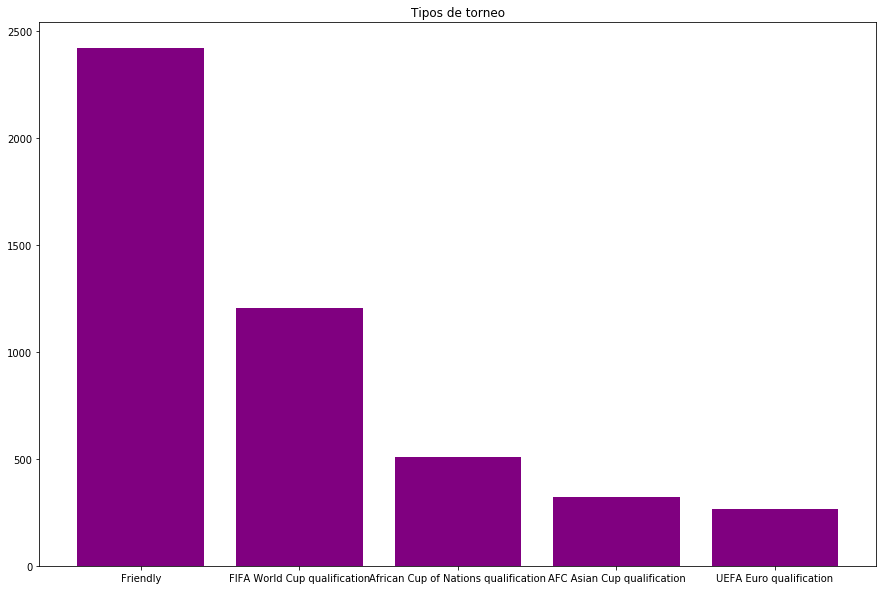

In [31]:

torneos_mas_jugados = torneo[0:5]
x = range(len(torneos_mas_jugados['tournament']))
    
tipos_torneos = ("Friendly", "FIFA World Cup qualification", "African Cup of Nations qualification", "AFC Asian Cup qualification", "UEFA Euro qualification")

plt.figure(figsize=(15,10))
plt.bar(x, torneos_mas_jugados['tournament'], align = "center", color = "purple")
plt.xticks(x, tipos_torneos)
plt.title("Tipos de torneo")
plt.show()

### Analizo torunament : Friendly 

In [71]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,resultado
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,...,225.85,2011-08-24,158.0,India,IND,53.20,7.65,20.69,81.54,ganador
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,...,184.24,2011-08-24,129.0,Singapore,SIN,109.17,33.18,26.41,168.76,empate
2,2011-08-30,Tahiti,Cook Islands,7,0,South Pacific Games,Boulari,New Caledonia,True,2011-08-30,...,56.95,2011-08-30,197.0,Cook Islands,COK,0.00,10.20,0.00,10.20,ganador
3,2011-09-06,Iceland,Cyprus,1,0,UEFA Euro qualification,Reykjavík,Iceland,False,2011-09-06,...,140.25,2011-09-06,76.0,Cyprus,CYP,159.77,55.42,53.88,269.07,ganador
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,China PR,False,2011-10-06,...,339.62,2011-10-06,112.0,United Arab Emirates,UAE,117.18,24.05,27.75,168.98,ganador


In [19]:
friendly = matches.loc [matches['tournament'] == 'Friendly']
friendly.head()


,date,home_team,away_team,home_score,away_score,tournament,city,rank_home,rank_away,resultado,weighted_points_home,weighted_points_away
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,114.0,158.0,ganador,225.85,81.54
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,120.0,129.0,empate,184.24,168.76
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,69.0,112.0,ganador,339.62,168.98
9,2011-11-12,Nigeria,Botswana,0,0,Friendly,Abuja,43.0,78.0,empate,409.94,311.74
18,2011-12-21,Chile,Paraguay,3,2,Friendly,La Serena,13.0,24.0,ganador,731.58,591.50


In [20]:
friendly = friendly.loc[:,['date', 'home_team', 'away_team', 'resultado',  'tournament']]
friendly.head()

,date,home_team,away_team,resultado,tournament
0,2011-08-24,Guyana,India,ganador,Friendly
1,2011-08-24,Thailand,Singapore,empate,Friendly
4,2011-10-06,China PR,United Arab Emirates,ganador,Friendly
9,2011-11-12,Nigeria,Botswana,empate,Friendly
18,2011-12-21,Chile,Paraguay,ganador,Friendly


In [88]:
print (friendly.groupby("resultado")['home_team'].value_counts().unstack(fill_value=0))

KeyError: 'resultado'

### Analizo equipos que mas han ganado:

In [17]:
rdo = pd.value_counts(matches["resultado"])
resultado = pd.DataFrame(rdo)
resultado

,resultado
ganador,3173
perdedor,1578
empate,1572


In [18]:
prueba_rdo = pd.crosstab(index=matches["home_team"], columns=matches['resultado'], 
margins=True).sort_values(['All'], ascending=False).head(15)
prueba_rdo

resultado,empate,ganador,perdedor,All
home_team,,,,
All,1572,3173,1578,6323
Qatar,67,173,68,308
Philippines,34,177,29,240
Bahrain,58,96,37,191
China PR,63,77,23,163
Saudi Arabia,35,83,31,149
United Arab Emirates,21,117,2,140
Jordan,46,61,26,133
Maldives,18,35,66,119


In [15]:
matches.describe()

,home_score,away_score,rank_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
count,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000,6323.000000
mean,1.637672,0.980864,105.531077,179.291831,49.288714,35.151605,263.732151,111.262534,164.504783,45.731030,32.626794,242.862606
std,1.656662,1.186146,45.949226,125.865658,36.696096,25.307988,166.589538,46.161001,122.659985,37.189208,24.758013,162.745271
min,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,72.000000,90.730000,20.530000,14.445000,139.030000,81.000000,82.620000,17.650000,12.750000,117.220000
50%,1.000000,1.000000,103.000000,154.280000,46.290000,31.200000,247.400000,112.000000,143.080000,43.640000,28.040000,226.040000
75%,2.000000,1.000000,144.000000,244.730000,68.300000,50.720000,334.620000,150.000000,231.840000,64.850000,46.090000,321.440000
max,15.000000,10.000000,206.000000,788.680000,244.620000,130.180000,1085.630000,209.000000,817.580000,244.620000,133.110000,1001.630000


In [17]:
matches ["home_team"].nunique()

172

In [55]:
matches ['weighted_points_home'] = matches['weighted_points_home'].astype(str)

In [57]:
matches.groupby (["resultado","weighted_points_home"]).away_team.value_counts().unstack(fill_value=0)

away_team                       Afghanistan  Albania  Algeria  American Samoa  \
resultado weighted_points_home                                                  
empate    10.2                            0        0        0               0   
          101.03                          1        0        0               0   
          101.24                          0        0        0               0   
          1022.29                         0        0        0               0   
          103.5                           0        0        0               0   
          104.0                           0        0        0               0   
          106.25                          0        0        0               0   
          106.74000000000001              2        0        0               0   
          109.76                          0        0        0               0   
          109.82000000000001              1        0        0               0   
          110.23                          0        0        0               0   
          110.80000000000001              0        0        0               0   
          111.66                          0        0        0               0   
          112.27000000000001              0        0        0               0   
          112.28                          0        0        0               0   
          113.22                          0        0        0               0   
          116.24                          0        0        0               0   
          117.22                          1        0        0               0   
          118.43                          0        0        0               0   
          119.07000000000001              0        0        0               0   
          12.75                           0        0        0               0   
          120.03                          0        0        0               0   
          122.91999999999999              0        0        0               0   
          123.41                          0        0        0               0   
          124.88                          0        0        0               0   
          125.24000000000001              0        0        0               0   
          126.09                          0        0        0               0   
          127.23                          0        0        0               0   
          129.68                          0        0        0               0   
          130.44                          0        0        0               0   
...                                     ...      ...      ...             ...   
perdedor  74.22                           0        0        0               0   
          74.44                           0        0        0               0   
          741.6                           0        0        0               0   
          75.44                           0        0        0               0   
          759.53                          0        2        0               0   
          76.93                           0        0        0               0   
          78.09                           0        0        0               0   
          79.69                           2        0        0               0   
          8.5                             2        0        0               0   
          80.59                           0        0        2               0   
          81.4                            0        0        2               0   
          83.16                           0        0        0               0   
          84.03                           0        0        0               0   
          84.33                           0        0        0               0   
          85.78                           0        0        0               0   
          861.9100000000001               0        0        0               0   
          87.13                

In [22]:
fifa_qua = matches [matches['tournament']=='FIFA World Cup qualification' ]
fifa_qua.head()
#"Friendly", "FIFA World Cup qualification", "African Cup of Nations qualification", "AFC Asian Cup qualification", "UEFA Euro qualification")

,date,home_team,away_team,home_score,away_score,tournament,city,rank_home,rank_away,resultado,weighted_points_home,weighted_points_away
6,2011-10-11,Singapore,Jordan,0,3,FIFA World Cup qualification,Singapore,136.0,85.0,perdedor,147.75,294.80
7,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,85.0,136.0,ganador,294.80,147.75
8,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,81.0,136.0,ganador,307.77,147.75
10,2011-11-15,Singapore,China PR,0,4,FIFA World Cup qualification,Singapore,136.0,69.0,perdedor,147.75,339.62
11,2011-11-15,Uzbekistan,Tajikistan,3,0,FIFA World Cup qualification,Tashkent,73.0,153.0,ganador,385.86,94.07


In [21]:
Equipo_local = pd.value_counts (matches ["home_team"])
eq_local = pd.DataFrame (Equipo_local)
print (eq_local.sort_index ( axis = 1, ascending = False))

                      home_team
Qatar                       308
Philippines                 240
Bahrain                     191
China PR                    163
Saudi Arabia                149
United Arab Emirates        140
Jordan                      133
Maldives                    119
Malaysia                    104
Kuwait                      100
India                        98
South Africa                 96
Iraq                         93
Botswana                     93
Hong Kong                    90
Zambia                       87
Peru                         82
Namibia                      80
Rwanda                       77
Congo DR                     75
Malta                        73
Vietnam                      72
Tunisia                      71
Bulgaria                     65
Guinea-Bissau                65
Lebanon                      64
Oman                         64
Niger                        59
Palestine                    57
Nigeria                      56
...     

In [19]:
Equipo_visitante = pd.value_counts (matches ["away_team"])
eq_vi = pd.DataFrame (Equipo_visitante)
print (eq_vi.sort_index ( axis = 1, ascending = False))

                      away_team
Qatar                       227
Philippines                 214
Kuwait                      169
Nepal                       151
Saudi Arabia                130
Jordan                      127
Congo DR                    122
Botswana                    121
Syria                       112
Cuba                        102
Sudan                       100
Palestine                    99
Bahrain                      97
Tunisia                      94
Venezuela                    93
Maldives                     89
Hong Kong                    88
Lebanon                      85
United Arab Emirates         85
Malaysia                     82
Malta                        79
Nigeria                      77
Cambodia                     75
Peru                         72
Iceland                      70
Azerbaijan                   68
Kazakhstan                   67
Bulgaria                     66
Northern Ireland             65
Belarus                      65
...     

Text(0.5, 1.0, 'Partidos jugados en fifa qualification')

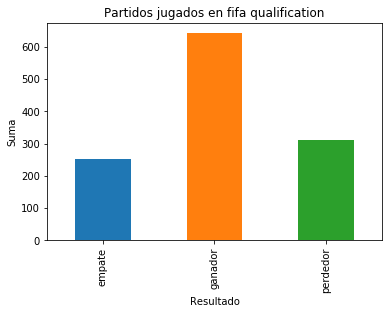

In [20]:
matches[matches["tournament"] == 'FIFA World Cup qualification']["resultado"].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Resultado')
plt.ylabel('Suma')
plt.title('Partidos jugados en fifa qualification')

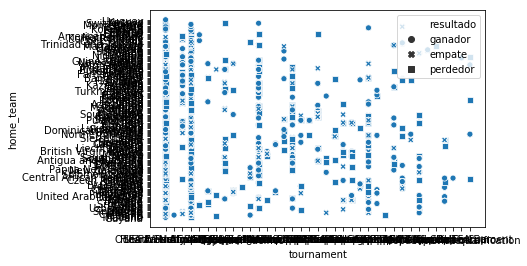

In [61]:
sns.scatterplot(x='tournament', y='home_team', style='resultado', data=matches)

In [72]:
best_five_t = pd.value_counts (matches ["tournament"])
best_five_t = pd.DataFrame (best_five_t)


                                      tournament
Friendly                                    2422
FIFA World Cup qualification                1204
African Cup of Nations qualification         509
AFC Asian Cup qualification                  322
UEFA Euro qualification                      265
African Nations Championship                 230
Gulf Cup                                     174
WAFF Championship                            155
COSAFA Cup                                   121
AFC Asian Cup                                111
AFC Challenge Cup                             94
CECAFA Cup                                    87
African Cup of Nations                        83
Gold Cup                                      81
SAFF Cup                                      67
Copa América                                  55
AFF Championship                              46
AFC Challenge Cup qualification               40
Oceania Nations Cup                           36
CFU Caribbean Cup qu

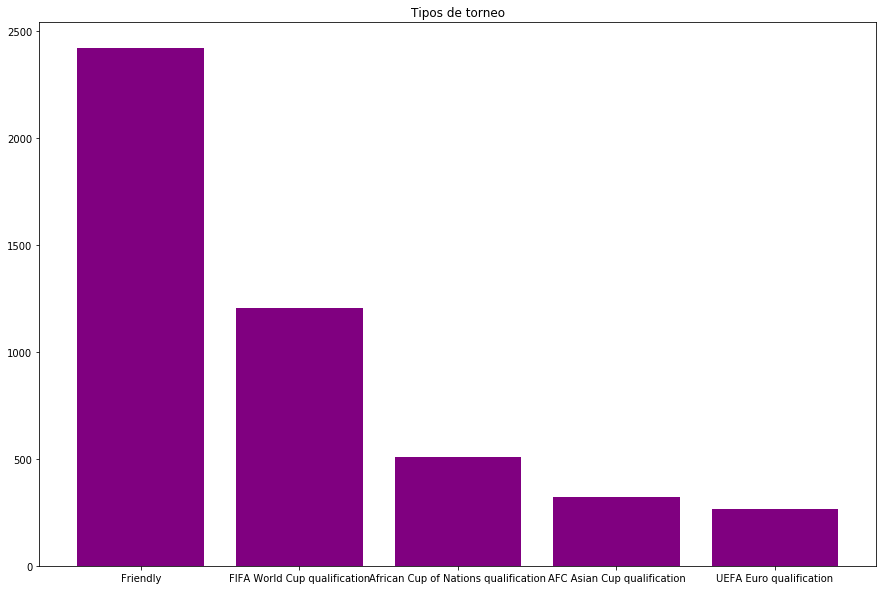

In [73]:
print(best_five_t.sort_index(axis=1, ascending=False))
best_five_tour = best_five_t[0:5]
x = range(len(best_five_tour['tournament']))
    
tipos_torneos = ("Friendly", "FIFA World Cup qualification", "African Cup of Nations qualification", "AFC Asian Cup qualification", "UEFA Euro qualification")

plt.figure(figsize=(15,10))
plt.bar(x, best_five_tour['tournament'], align = "center", color = "purple")
plt.xticks(x, tipos_torneos)
plt.title("Tipos de torneo")
plt.show()

Text(0.5, 1.0, 'Pesos')

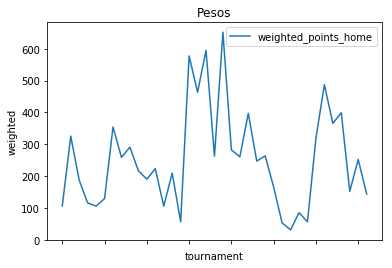

In [68]:
matches.groupby('tournament')['weighted_points_home'].mean().plot(kind='line',legend='Reverse')
plt.xlabel('tournament')
plt.ylabel('weighted')
plt.title('Pesos')


Text(0.5, 1.0, 'Pesos')

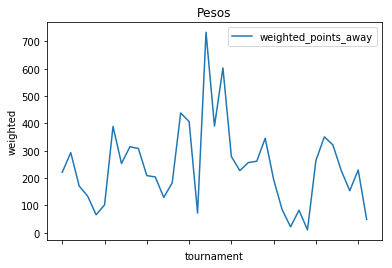

In [24]:
matches.groupby('tournament')['weighted_points_away'].mean().plot(kind='line',legend='Reverse')
plt.xlabel('tournament')
plt.ylabel('weighted')
plt.title('Pesos')

# Grafico por torneos!
### Graficos con filtros: https://pbpython.com/seaborn09.html

FIFA World Cup qualification               
UEFA Euro qualification  
Copa América                                
                         
UEFA Euro 


fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['date','type']).count()['amount'].plot(ax=ax)


Text(0.5, 1.0, 'Partidos jugados en fifa qualification')

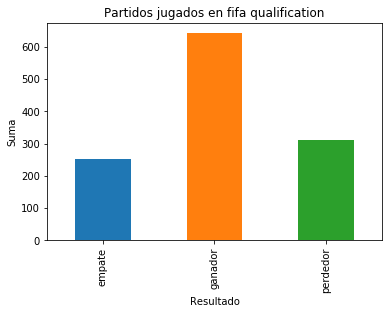

In [25]:
matches[matches["tournament"] == 'FIFA World Cup qualification']["resultado"].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Resultado')
plt.ylabel('Suma')
plt.title('Partidos jugados en fifa qualification')

Text(0.5, 1.0, 'Partidos jugados en fifa qualification')

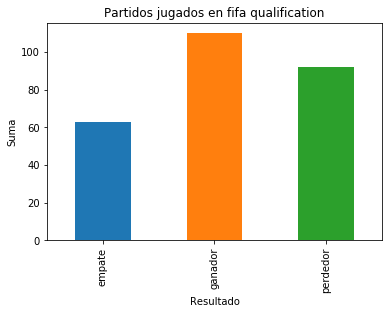

In [20]:
matches[matches["tournament"] == 'UEFA Euro qualification']["resultado"].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Resultado')
plt.ylabel('Suma')
plt.title('Partidos jugados en fifa qualification')

Text(0.5, 1.0, 'Partidos jugados en fifa qualification')

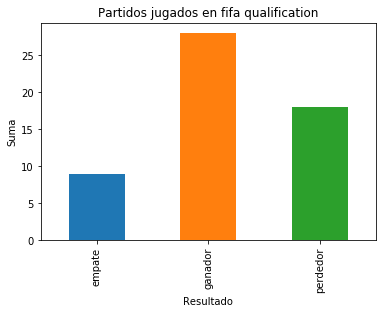

In [23]:
matches[matches["tournament"] == 'Copa América']["resultado"].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Resultado')
plt.ylabel('Suma')
plt.title('Partidos jugados en fifa qualification')

## Cargo base de datos: world cup

In [41]:
world_cup = pd.read_csv('World Cup 2018 Dataset.csv')
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match \nagainst', 'Second match\n against', 'Third match\n against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "Korea Republic"})
world_cup = world_cup.set_index('Team')

## Comienzo a modelar los datos y hallar el modelo de prediccion para la las fechas del mundial 2018 Rusia 

In [31]:
world_cup.head(10)

,Group,First match against,Second match against,Third match against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran
Spain,B,Portugal,Iran,Morocco
Morocco,B,Iran,Portugal,Spain
Iran,B,Morocco,Spain,Portugal
France,C,Australia,Peru,Denmark


In [39]:
world_cup.shape

(32, 4)

In [18]:
matches.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,resultado
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,Guyana,False,2011-08-24,...,225.85,2011-08-24,158.0,India,IND,53.20,7.65,20.69,81.54,ganador
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,Thailand,False,2011-08-24,...,184.24,2011-08-24,129.0,Singapore,SIN,109.17,33.18,26.41,168.76,empate
2,2011-08-30,Tahiti,Cook Islands,7,0,South Pacific Games,Boulari,New Caledonia,True,2011-08-30,...,56.95,2011-08-30,197.0,Cook Islands,COK,0.00,10.20,0.00,10.20,ganador
3,2011-09-06,Iceland,Cyprus,1,0,UEFA Euro qualification,Reykjavík,Iceland,False,2011-09-06,...,140.25,2011-09-06,76.0,Cyprus,CYP,159.77,55.42,53.88,269.07,ganador
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,China PR,False,2011-10-06,...,339.62,2011-10-06,112.0,United Arab Emirates,UAE,117.18,24.05,27.75,168.98,ganador
5,2011-10-11,Albania,Romania,1,1,UEFA Euro qualification,Tirana,Albania,False,2011-10-11,...,319.51,2011-10-11,49.0,Romania,ROU,292.29,103.22,83.84,479.35,empate
6,2011-10-11,Singapore,Jordan,0,3,FIFA World Cup qualification,Singapore,Singapore,False,2011-10-11,...,147.75,2011-10-11,85.0,Jordan,JOR,250.60,16.21,27.99,294.80,perdedor
7,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,Jordan,False,2011-11-11,...,294.80,2011-11-11,136.0,Singapore,SIN,87.61,33.18,26.96,147.75,ganador
8,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,Jordan,False,2011-11-11,...,307.77,2011-11-11,136.0,Singapore,SIN,87.61,33.18,26.96,147.75,ganador
9,2011-11-12,Nigeria,Botswana,0,0,Friendly,Abuja,Nigeria,False,2011-11-12,...,409.94,2011-11-12,78.0,Botswana,BOT,267.93,19.85,23.96,311.74,empate


Creo columnas que utilizare para lograr una buena prediccion> 

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 901
Data columns (total 25 columns):
date                            902 non-null datetime64[ns]
home_team                       902 non-null object
away_team                       902 non-null object
home_score                      902 non-null int64
away_score                      902 non-null int64
tournament                      902 non-null object
city                            902 non-null object
country                         902 non-null object
neutral                         902 non-null bool
rank_home                       902 non-null int64
country_full_home               902 non-null object
country_abrv_home               902 non-null object
cur_year_avg_weighted_home      902 non-null float64
rank_date_home                  902 non-null datetime64[ns]
two_year_ago_weighted_home      902 non-null float64
three_year_ago_weighted_home    902 non-null float64
weighted_points_home            902 non-null floa

In [24]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away'] #entiendo que tiene mas peso
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2 #ranking promedio 
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away'] #diferencia de puntos
matches['score_difference'] = matches['home_score'] - matches['away_score'] #diferencia de goles 
matches['is_won'] = matches['score_difference'] > 0 #gano? tomo el empate como triunfo 
matches['match_notfriendly'] = matches['tournament'] != 'Friendly' #distingo entre friendly y no friendly

In [33]:
matches.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,rank_home,rank_away,resultado,weighted_points_home,weighted_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,match_notfriendly
0,2011-08-24,Guyana,India,2,1,Friendly,Providence,114.0,158.0,ganador,225.85,81.54,-44.0,136.0,144.31,1,True,False
1,2011-08-24,Thailand,Singapore,0,0,Friendly,Bangkok,120.0,129.0,empate,184.24,168.76,-9.0,124.5,15.48,0,False,False
2,2011-08-30,Tahiti,Cook Islands,7,0,South Pacific Games,Boulari,183.0,197.0,ganador,56.95,10.20,-14.0,190.0,46.75,7,True,True
3,2011-09-06,Iceland,Cyprus,1,0,UEFA Euro qualification,Reykjavík,124.0,76.0,ganador,140.25,269.07,48.0,100.0,-128.82,1,True,True
4,2011-10-06,China PR,United Arab Emirates,2,1,Friendly,Shenzhen,69.0,112.0,ganador,339.62,168.98,-43.0,90.5,170.64,1,True,False
5,2011-10-11,Albania,Romania,1,1,UEFA Euro qualification,Tirana,71.0,49.0,empate,319.51,479.35,22.0,60.0,-159.84,0,False,True
6,2011-10-11,Singapore,Jordan,0,3,FIFA World Cup qualification,Singapore,136.0,85.0,perdedor,147.75,294.80,51.0,110.5,-147.05,-3,False,True
7,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,85.0,136.0,ganador,294.80,147.75,-51.0,110.5,147.05,2,True,True
8,2011-11-11,Jordan,Singapore,2,0,FIFA World Cup qualification,Amman,81.0,136.0,ganador,307.77,147.75,-55.0,108.5,160.02,2,True,True
9,2011-11-12,Nigeria,Botswana,0,0,Friendly,Abuja,43.0,78.0,empate,409.94,311.74,-35.0,60.5,98.20,0,False,False


### Aplico SKLEARN train test split

In [16]:
X, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'match_notfriendly']], matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



Armo el Modelo de Regresion Logistica
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [65]:
logit = linear_model.LogisticRegression (C=0.001) 
features = PolynomialFeatures (degree=4) #creo combinaciones polimoniales
model = Pipeline ([
    ('polynomial_features', features),
    ('logistic_regression', logit)
])
model = model.fit(X_train, y_train)

In [18]:
print (model)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('logistic_regression', LogisticRegression(C=2.78, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])


In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


In [70]:
y_pred


array([False,  True, False, ...,  True,  True,  True])

In [71]:
y_test

4086    False
5907     True
712     False
3650    False
2668     True
156     False
4915     True
2921     True
1886     True
2812    False
2022    False
2942    False
4372     True
2843    False
3737    False
4059    False
6136    False
1876     True
6303    False
4427    False
469     False
5296     True
496      True
3668     True
2586     True
1694    False
2077    False
1323    False
2864     True
3044    False
        ...  
2157     True
4239    False
3832    False
4564     True
2164     True
471      True
3347     True
5612    False
4083     True
4126    False
5972    False
5246    False
896      True
5457     True
251      True
1209     True
3710    False
2718    False
2868     True
1128     True
4728     True
2770     True
57       True
3563     True
1433    False
292     False
1142     True
4466     True
4689    False
1170    False
Name: is_won, Length: 1265, dtype: bool

### Analizo la precision con F1 score
Es el promedio del peso de la precision respecto a la historia, cuanto mas cercano el valor este a 1 mejor sera la misma. 

In [19]:
from sklearn.metrics import f1_score

In [22]:
f1_score(y_test, y_pred )

0.6537267080745343

Analizo precison sin generar ningun entrenamiento de los datos:

In [23]:
from sklearn.dummy import DummyClassifier

In [26]:
dummy_majority = DummyClassifier (strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict (X_test)
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Test score: 0.50


In [27]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print ("Dummy Score:{:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
pred_logreg = logreg.predict (X_test)
print("Regresion Logistica Score:{:.2f}".format(logreg.score(X_test,y_test)))

Dummy Score:0.49
Regresion Logistica Score:0.65


In [29]:
from sklearn.metrics import f1_score
print ("f1 score most frequent: {:.2f}".format(f1_score (y_test, pred_most_frequent)))


f1 score most frequent: 0.67


### ROC CURVE

No handles with labels found to put in legend.


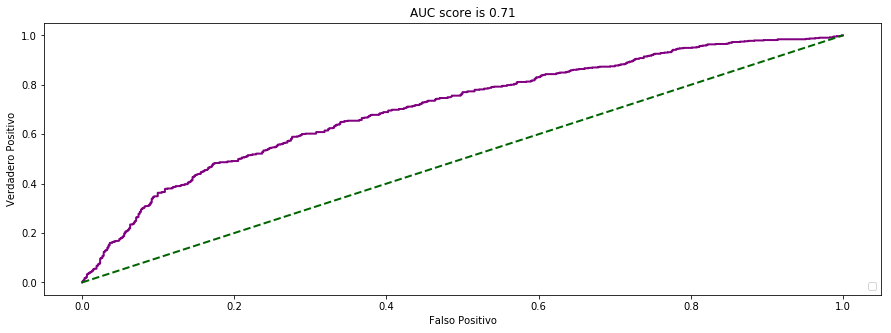

In [73]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
plt.plot(fpr, tpr, color='purple',
         lw=2, )
plt.plot([0, 1], [0, 1], color='darkgreen', lw=2, linestyle='--')

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
plt.legend(loc="lower right")
plt.show()

Se observa que la AUC de 0.735. Los resultados también sugieren que los equipos con rangos más bajos no son muy predecibles. Lo mismo se aplica a los partidos con rangos muy similares (lo que parece ser razonable).

### Analizamos diferentes valores para el parametro C
f1 score! --> Es el promedio ponderado entre la precision y el "historico". La contribucion relativa de ambos entonces, es la misma! Va desde 1 (OK) hasta 0


La regularización es aplicar una penalización al aumentar la magnitud de los valores de los parámetros para reducir el sobreajuste. Cuando entrena un modelo como un modelo de regresión logística, está eligiendo parámetros que le dan el mejor ajuste a los datos. Esto significa minimizar el error entre lo que el modelo predice para su variable dependiente, dados sus datos en comparación con lo que realmente es su variable dependiente.

In [42]:
var1 = matches.var()
var1.mean()

7046.324885139737

In [48]:
lgr=LogisticRegression().fit(X_train,y_train)
lgr.predict(X_test)
lgr.score(X_test, y_test)
#X, y = matches(return_X_y=True)
#LogisticRegression(random_state=0, solver='lbgfs', multi_class='multinomial').fit(X,y)
#clf.predict (X[:2,:])
#clf.score(X,y)
#print("training set score: %f" % lgr.score(X_train, y_train))
#print('\n'"test set score: %f" % lgr.score(X_test, y_test))

0.6474308300395257

In [60]:
lgr0001=LogisticRegression(C=0.001).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))



training set score of lgr100: 0.657374

test set score of lgr100: 0.647431


In [61]:
lgr0000001=LogisticRegression(C=0.000001).fit(X_train,y_train)
print('\n'"training set score of lgr001: %f" % lgr001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % lgr001.score(X_test, y_test))


training set score of lgr001: 0.652827

test set score of lgr001: 0.642688


In [63]:
lgr1=LogisticRegression(C=1).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))


training set score of lgr100: 0.657374

test set score of lgr100: 0.647431


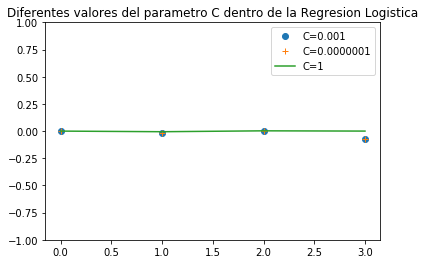

In [64]:
plt.plot(lgr.coef_.T,'o',label='C=0.001')
plt.plot(lgr100.coef_.T,'+',label='C=0.0000001')
plt.plot(lgr001.coef_.T,'-',label='C=1')
plt.ylim(-1,1)
plt.title('Diferentes valores del parametro C dentro de la Regresion Logistica')
plt.legend()
plt.show()

In [ ]:
X, y =

In [43]:
#lr_model = LogisticRegression(C=100)
#lr_model.fit(X_train, y_train)

#lr_predict_probabilities = lr_model.predict(X_test)[:,1]

### Analizo a traves de Grid Search 

In [60]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Creo el penalty espacio
penalty = ['l1', 'l2']

# Regularizo el parametro
C = np.logspace(0, 4, 10)

# Creo opciones para mis parametros
hyperparameters = dict(C=C, penalty=penalty)

In [61]:
clf = GridSearchCV(logit, hyperparameters, cv=5, verbose=0)

In [62]:
# Pruebo el modelo 
best_model = clf.fit(X, y)

In [63]:
# el mejor parametro es: 
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.7825594022071245


In [65]:
# Predict target vector
best_model.predict(X)

array([ True,  True,  True, ..., False,  True,  True])

# Cross Validation!
https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

In [98]:
from sklearn.preprocessing import StandardScaler  
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [100]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5) 

In [102]:
print(all_accuracies)  

[0.65646594 0.66106719 0.6330366  0.64886251 0.66172107]


In [103]:
print(all_accuracies.mean())  

0.6522306628923512


# Matriz de confusion

Text(0.5, 1.0, 'Performance on the Test set')

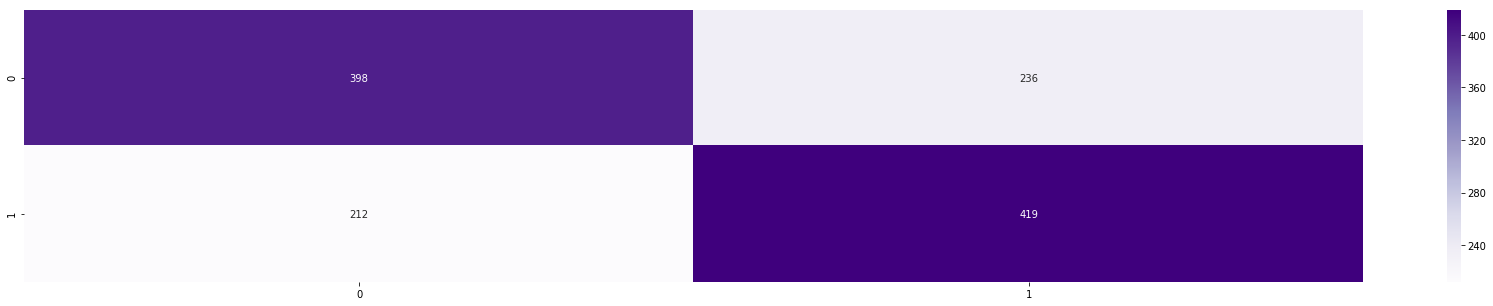

In [43]:
#ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(30,5))
#ax.imshow(cm, cmap='binary', clim = (0, cm.max())) 
sns.heatmap (cm, linecolor='green', cmap ='Purples', annot=True, fmt="d")
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')



